**COMP3670/6670 Tutorial Week 9**
---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Task 1: SVM

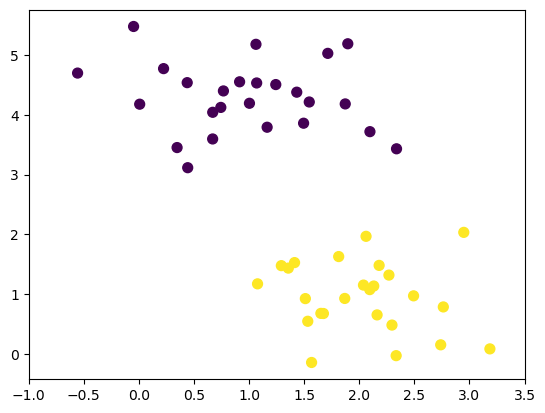

In [3]:
#pip install scikit-learn
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
#Which one is the data and which one is the label?

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.xlim(-1, 3.5);
plt.show()

In [10]:
from sklearn.svm import SVC #support vector machine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear',verbose=1) 
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred))

[LibSVM]*
optimization finished, #iter = 8
obj = -0.752186, rho = 2.404901
nSV = 3, nBSV = 0
Total nSV = 3
SVM Accuracy: 1.0


[[2.09680487 3.7174206 ]
 [0.44359863 3.11530945]
 [2.06156753 1.96918596]]


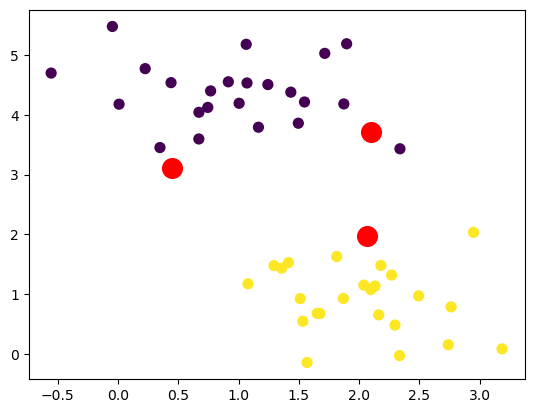

In [17]:
#Visualising support vectors
print(svm.support_vectors_)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
            s=200, facecolors='red');

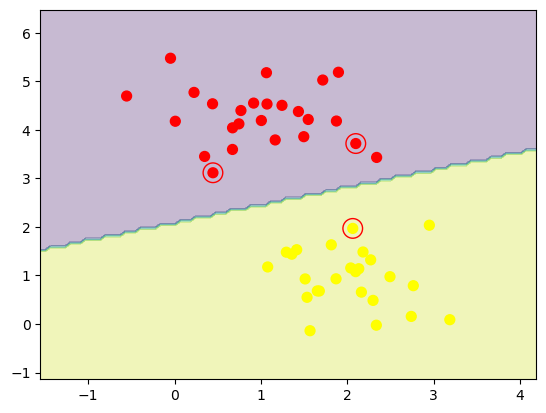

In [19]:
#Plot the decision boundary in some meaningful way, i.e., the separating hyperplane between the support vectors
# Function to plot the decision boundary
def plot_decision_boundary(data, model):
    # Create a mesh grid to evaluate the model
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Predict class for every point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)
    
    # Plot the original data points
    plt.scatter(data[:, 0], data[:, 1], c=y, s=50, cmap='autumn')
    
    # Plot the support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=200, facecolors='none', edgecolors='red')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

# Use the function to plot the decision boundary
plot_decision_boundary(X, svm)

# Task 2: Perceptron

In [16]:
from sklearn.linear_model import Perceptron 
#Making a perceptron classifier 
perceptron = Perceptron(max_iter=100, random_state=42, verbose=1) 
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)
print("Perceptron Accuracy:", accuracy_score(y_test, y_pred_perceptron))

-- Epoch 1
Norm: 4.03, NNZs: 2, Bias: 1.000000, T: 40, Avg. loss: 0.360679
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 4.03, NNZs: 2, Bias: 1.000000, T: 80, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.03, NNZs: 2, Bias: 1.000000, T: 120, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 4.03, NNZs: 2, Bias: 1.000000, T: 160, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.03, NNZs: 2, Bias: 1.000000, T: 200, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.03, NNZs: 2, Bias: 1.000000, T: 240, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.03, NNZs: 2, Bias: 1.000000, T: 280, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds
Perceptron Accuracy: 0.9


[[ 2.63514244 -3.0556864 ]] [1.]


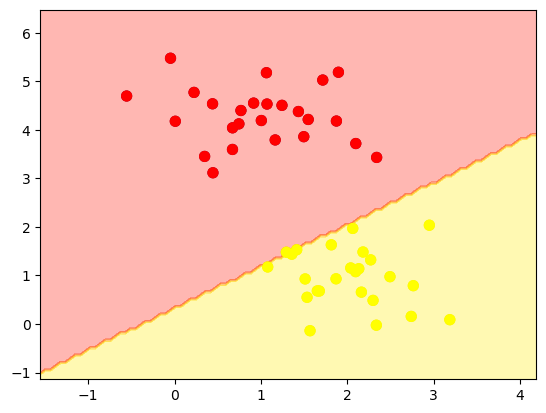

In [23]:
print(perceptron.coef_, perceptron.intercept_) #Decision boundary coefficients and bias
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

#plot decision boundary defined by coefficients and intercept
# Function to plot the decision boundary for the Perceptron
def plot_decision_boundary(data, model):
    # Create a mesh grid to evaluate the model
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Predict class for every point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='autumn')
    
    # Plot the original data points
    plt.scatter(data[:, 0], data[:, 1], c=y, s=50, cmap='autumn')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

# Use the function to plot the decision boundary for the Perceptron
plot_decision_boundary(X, perceptron)


# Task 3: Perceptron Algorithm

In [48]:
def perceptron_algorithm(X, y, epochs=100, learning_rate=1.0):
    # Add a bias term to X (bias trick)
    X = np.c_[np.ones(X.shape[0]), X]  # Add bias as the first column
    weights = np.zeros(X.shape[1])      # Initialize weights with zeros
    
    for epoch in range(epochs):
        for i in range(len(X)):
            # Predict: dot product of weights and input
            linear_output = np.dot(X[i], weights)
            prediction = 1 if linear_output >= 0 else 0
            
            # Update weights if prediction is incorrect
            if prediction != y[i]:
                weights += learning_rate * (y[i] - prediction) * X[i]
    
    return weights

In [50]:
# Function to print the heatmap of weights
def print_heatmap(weights, l=8, h=8):
    """
    This function takes the weight vector (1D) and reshapes it into a 2D grid
    to visualize as a heatmap. You can adjust `l` and `h` to match the desired shape.
    
    :param weights: 1D array of weights (excluding bias)
    :param l: width of the grid
    :param h: height of the grid
    """
    # Ensure that the weights can be reshaped into l x h grid
    if len(weights) != l * h:
        raise ValueError(f"Cannot reshape weights of length {len(weights)} into {l}x{h} grid")

    # Reshape weights to a 2D grid
    reshaped_weights = weights.reshape((l, h))

    # Create heatmap using matshow
    plt.matshow(reshaped_weights, cmap='viridis')
    plt.colorbar()  # Show color scale
    plt.title("Weights Heatmap")
    plt.show()

# Task 4: 0/1 Digit Classification

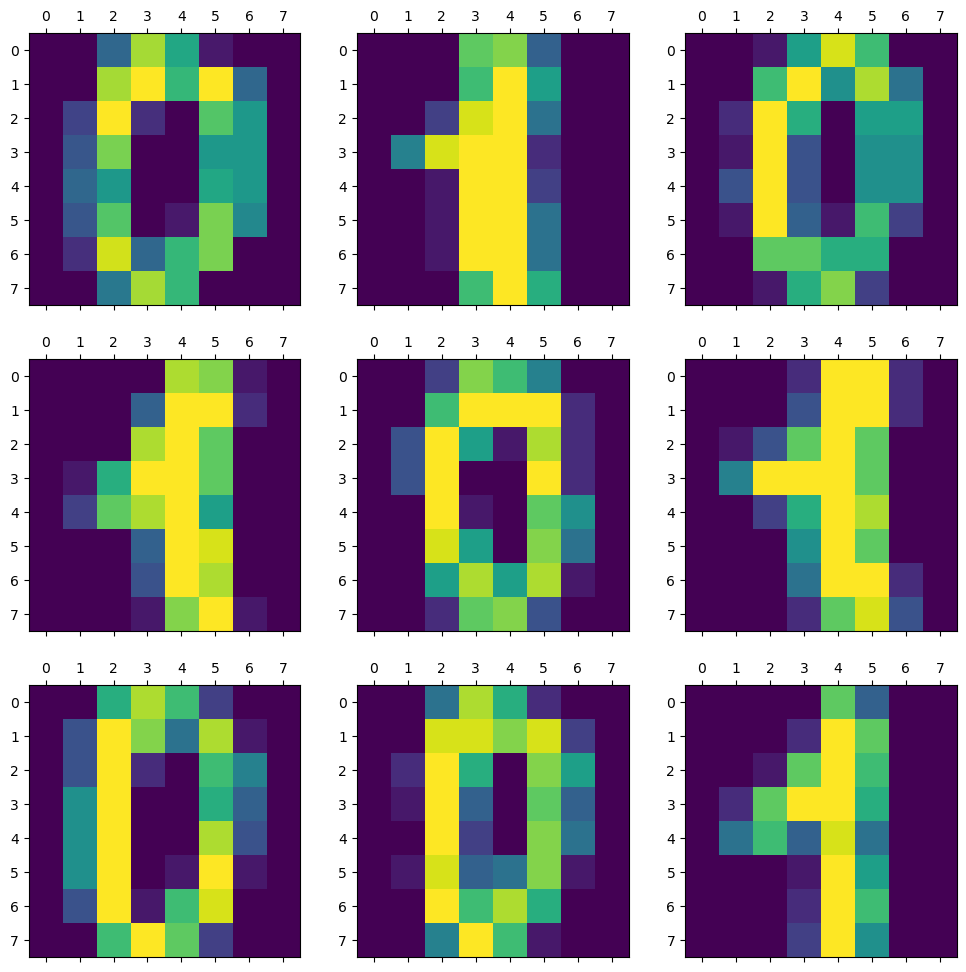

In [41]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
digits,labels = datasets.load_digits(return_X_y=True)
classes = [0,1] #Binary classification. Try changing these
only_keep_2_classes = np.isin(labels, classes)
X = digits[only_keep_2_classes]
y = labels[only_keep_2_classes]

# Function to plot the heatmap of a digit image
def print_heatmap(data, l=8, h=8, ax=None):
    if ax is None:
        ax = plt.gca()  # Get current axis if not provided
    ax.matshow(data.reshape(l, h))
    # ax.axis('off')

# Create a 2x2 figure layout using plt.subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # 2x2 grid of subplots

# Plot heatmaps in each subplot
for i in range(3):
    for j in range(3):
        print_heatmap(X[i * 3 + j], ax=axes[i, j])

# Display the figure
plt.show()

## What do the weights mean?

Weights: [  1.   0.   0.  -1. -12.   3.  35.   4.   0.   0.   3. -16.  -7.  20.
 -10.   0.   0.   2.  16. -12.  47.  74. -16. -14.   0.   1.  12.   1.
  45.  57. -15. -26.   0.   0. -19. -42.  45.  53. -14. -22.   0.   0.
 -10. -45.  38.  21. -17. -13.   0.   0.  -2. -41.   5.   6.  -4.   4.
   0.   0.   0.  -6. -11.   7.  42.   7.   0.]
Length of weight vector: 65


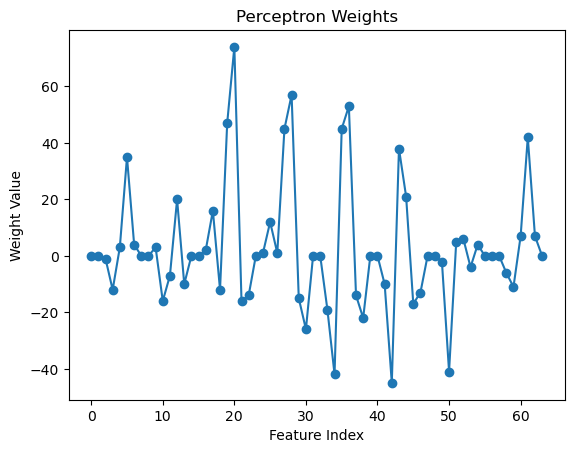

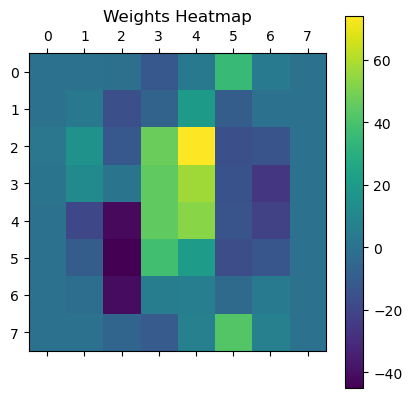

In [52]:
weights = perceptron_algorithm(X, y, 100) #Run the perceptron classifier to distinguish 

# Check the structure of weights
print("Weights:", weights)
print("Length of weight vector:", len(weights))  # Check the size of the weight vector

# Instead of using print_heatmap, let's visualize the weight vector if needed:
plt.plot(weights[1:], marker='o')
plt.title("Perceptron Weights")
plt.xlabel("Feature Index")
plt.ylabel("Weight Value")
plt.show()

# Implement perceptron and test the shape of the weight you get.
print_heatmap(weights[1:], l=8, h=8) #What does this represent for the classification problem?

# What do the weights mean
weights typically represent the learned parameters of the linear classifier.
The weights vector contains the coefficients corresponding to the features of your dataset X. These are learned by the 
Perceptron algortihm during training. Each weight in the vector is associated with a feature from the input data and
reflects the importance or contribution of that feature in classifying the data points.
Mathematically, if X is your feature matrix (with n samples and m features), and w is your weights vector 
(with m weights), the linear combination for each sample is computed as:

    y=w1x1+w2x2+⋯+wmxm+b
    y=w1​x1​+w2​x2​+⋯+wm​xm​+b 
    
    where:
    w1,w2,…,wm​ are the weights (coefficients).
    x1,x2,…,xm​ are the features of a sample.
    b is the bias term (or intercept).
    
Bias Term: In many implementations, the weights array may include a bias term. The bias term 
(often denoted as bb or w0w0​) allows the decision boundary to shift away from the origin. 
It acts as an intercept in the decision function. This term is sometimes learned separately or 
included in the weight vector.

# Role of weights in decision boundary
The decision boundary in 2D can be interpreted as: w1x1+w2x2+b = 0
This line (or hyperplane in higher dimensions) separates the data points into two classes. 
The weights define the orientation of this boundary, and the bias determines its position relative to the origin.

# Perceptron Algorithm Update Rule:
The perceptron algorithm iteratively updates the weights based on the classification errors (misclassified points). The update rule is:

    w=w+η(ytrue​−ypred​)X
    
    where:
    η is the learning rate.
    ytrue​ is the true label.
    ypred is the predicted label.
    X is the feature vector of the current sample.

The weights vector is updated during training until the algorithm converges or the maximum number of iterations is reached